<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj9/Naive_Bayes_zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [74]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}

df = pd.DataFrame(data_spam)
df

,Słowo_1,Słowo_2,Wykrzyknik,Spam
0,darmowy,wygrana,TAK,TAK
1,darmowy,wygrana,TAK,TAK
2,spotkanie,jutro,NIE,NIE
3,raport,kwartalny,NIE,NIE
4,oferta,specjalna,TAK,NIE
5,darmowy,rabat,TAK,TAK
6,spotkanie,dziś,NIE,NIE
7,oferta,limitowana,TAK,NIE
8,raport,miesięczny,NIE,NIE
9,darmowy,rabat,TAK,TAK


## b) Implementacja w Python

In [75]:
print("=" * 60)
print("KROK 1: PRAWDOPODOBIEŃSTWA A PRIORI")
print("=" * 60)

total_samples = len(df)
feature_cols = ["Słowo_1", "Słowo_2", "Wykrzyknik"]
target_col = "Spam"
target_values = df[target_col].unique() # [TAK, NIE]
target_counts = df[target_col].value_counts()
prior_probs = target_counts / total_samples

print(f"\nCechy: {feature_cols}")
print(f"Target: {target_col}")
print(f"Wartości target: {target_values}\n")

for target_value, count in target_counts.items():
    print(f"Liczba przypadków {target_value}: {count}")

print(f"Razem przypadków: {total_samples}\n")

for target_value, prior_prob in prior_probs.items():
    print(f"P({target_value}) = {target_counts.get(target_value, 0)} / {total_samples} = {prior_prob:.3f}")

KROK 1: PRAWDOPODOBIEŃSTWA A PRIORI

Cechy: ['Słowo_1', 'Słowo_2', 'Wykrzyknik']
Target: Spam
Wartości target: ['TAK' 'NIE']

Liczba przypadków NIE: 8
Liczba przypadków TAK: 4
Razem przypadków: 12

P(NIE) = 8 / 12 = 0.667
P(TAK) = 4 / 12 = 0.333


In [76]:
print("=" * 60)
print("KROK 2: PRAWDOPODOBIEŃSTWA WARUNKOWE")
print("=" * 60)

conditional_probs = {}

for feature in feature_cols: # ["Słowo_1", "Słowo_2", "Wykrzyknik"]
    print("\n" + "=" * 60)
    print(f"Cecha: {feature.upper()}")
    print("=" * 60)

    conditional_probs[feature] = {}
    feature_values = df[feature].unique()
    feature_count = len(feature_values)

    print(f"Wartości cechy: {feature_values}")

    for target_value in target_values: # [TAK, NIE]
        target_subset = df[df[target_col] == target_value]
        target_count = len(target_subset)
        feature_counts = target_subset[feature].value_counts()
        conditional_probs[feature][target_value] = {}

        print(f"\nDla target {target_value} ({target_count} przypadków):")
        print("-" * 40)

        for feature_value in feature_values: # [darmowy, spotkanie, ...]
            feature_value_count = feature_counts.get(feature_value, 0)
            # conditional_prob = feature_value_count / target_count

            # Laplace Smoothing
            a = 1
            conditional_prob = (feature_value_count + a) / (target_count + a * feature_count)
            conditional_probs[feature][target_value][feature_value] = conditional_prob # {Słowo_1: {TAK: {darmowy: 0.33, spotkanie: 0.33, ...}}}

            print(f"  {feature_value:12s}: {feature_value_count} przypadków → "
                  f"P({feature_value} | {target_value}) = {conditional_prob:.3f}")

KROK 2: PRAWDOPODOBIEŃSTWA WARUNKOWE

Cecha: SŁOWO_1
Wartości cechy: ['darmowy' 'spotkanie' 'raport' 'oferta']

Dla target TAK (4 przypadków):
----------------------------------------
  darmowy     : 4 przypadków → P(darmowy | TAK) = 0.625
  spotkanie   : 0 przypadków → P(spotkanie | TAK) = 0.125
  raport      : 0 przypadków → P(raport | TAK) = 0.125
  oferta      : 0 przypadków → P(oferta | TAK) = 0.125

Dla target NIE (8 przypadków):
----------------------------------------
  darmowy     : 0 przypadków → P(darmowy | NIE) = 0.083
  spotkanie   : 3 przypadków → P(spotkanie | NIE) = 0.333
  raport      : 2 przypadków → P(raport | NIE) = 0.250
  oferta      : 3 przypadków → P(oferta | NIE) = 0.333

Cecha: SŁOWO_2
Wartości cechy: ['wygrana' 'jutro' 'kwartalny' 'specjalna' 'rabat' 'dziś' 'limitowana'
 'miesięczny' 'pilne' 'wyjątkowa']

Dla target TAK (4 przypadków):
----------------------------------------
  wygrana     : 2 przypadków → P(wygrana | TAK) = 0.214
  jutro       : 0 przypadków

In [77]:
print("\n" + "=" * 60)
print("PODSUMOWANIE - TABELE PRAWDOPODOBIEŃSTW")
print("=" * 60)

for feature in feature_cols: # ["Słowo_1", "Słowo_2", "Wykrzyknik"]
    print(f"\n{feature.upper()}:")
    print("-" * 60)
    print(f"{"Wartość":15s} | P({feature}|TAK) | P({feature}|NIE)")
    print("-" * 60)

    feature_values = df[feature].unique()

    for feature_value in feature_values: # [darmowy, spotkanie, ...], [wygrana, jutro, ...]
        feature_tak_prob = conditional_probs[feature]["TAK"].get(feature_value, 0)
        feature_nie_prob = conditional_probs[feature]["NIE"].get(feature_value, 0)

        print(f"{feature_value:15s} | {feature_tak_prob:14.3f} | {feature_nie_prob:14.3f}")


PODSUMOWANIE - TABELE PRAWDOPODOBIEŃSTW

SŁOWO_1:
------------------------------------------------------------
Wartość         | P(Słowo_1|TAK) | P(Słowo_1|NIE)
------------------------------------------------------------
darmowy         |          0.625 |          0.083
spotkanie       |          0.125 |          0.333
raport          |          0.125 |          0.250
oferta          |          0.125 |          0.333

SŁOWO_2:
------------------------------------------------------------
Wartość         | P(Słowo_2|TAK) | P(Słowo_2|NIE)
------------------------------------------------------------
wygrana         |          0.214 |          0.056
jutro           |          0.071 |          0.111
kwartalny       |          0.071 |          0.111
specjalna       |          0.071 |          0.111
rabat           |          0.214 |          0.056
dziś            |          0.071 |          0.111
limitowana      |          0.071 |          0.111
miesięczny      |          0.071 |          0

In [78]:
print("\n" + "=" * 60)
print("KROK 3: PREDYKCJA DLA NOWEGO REKORDU")
print("=" * 60)

new_record = {
    "Słowo_1": "darmowy",
    "Słowo_2": "wygrana",
    "Wykrzyknik": "TAK"
}

print(f"\nNowy rekord:")

for key, val in new_record.items():
    print(f"  {key}: {val}")

scores = {}

for target_value in target_values: # [TAK, NIE]
    print(f"\n{"="*60}")
    print(f"Obliczenia dla klasy: {target_value}")
    print(f"→ Score({target_value}) = P({target_value}) × P(Słowo_1|{target_value}) × P(Słowo_2|{target_value}) × P(Wykrzyknik|{target_value})")
    print(f"{"="*60}")

    step = 1
    score = prior_probs[target_value]

    print(f"\n{step}. Prior: P({target_value}) = {score:.3f}")

    for new_feature, new_feature_value in new_record.items(): # {Słowo_1: darmowy}
        step += 1
        new_feature_prob = conditional_probs[new_feature][target_value].get(new_feature_value, 0)
        score *= new_feature_prob

        print(f"\n{step}. P({new_feature}={new_feature_value} | {target_col}={target_value}) = {new_feature_prob:.3f}")
        print(f"   Score po mnożeniu: {score:.6f}")

    print(f"\nWynik końcowy dla {target_value}: {score:.6f}")
    scores[target_value] = score


KROK 3: PREDYKCJA DLA NOWEGO REKORDU

Nowy rekord:
  Słowo_1: darmowy
  Słowo_2: wygrana
  Wykrzyknik: TAK

Obliczenia dla klasy: TAK
→ Score(TAK) = P(TAK) × P(Słowo_1|TAK) × P(Słowo_2|TAK) × P(Wykrzyknik|TAK)

1. Prior: P(TAK) = 0.333

2. P(Słowo_1=darmowy | Spam=TAK) = 0.625
   Score po mnożeniu: 0.208333

3. P(Słowo_2=wygrana | Spam=TAK) = 0.214
   Score po mnożeniu: 0.044643

4. P(Wykrzyknik=TAK | Spam=TAK) = 0.833
   Score po mnożeniu: 0.037202

Wynik końcowy dla TAK: 0.037202

Obliczenia dla klasy: NIE
→ Score(NIE) = P(NIE) × P(Słowo_1|NIE) × P(Słowo_2|NIE) × P(Wykrzyknik|NIE)

1. Prior: P(NIE) = 0.667

2. P(Słowo_1=darmowy | Spam=NIE) = 0.083
   Score po mnożeniu: 0.055556

3. P(Słowo_2=wygrana | Spam=NIE) = 0.056
   Score po mnożeniu: 0.003086

4. P(Wykrzyknik=TAK | Spam=NIE) = 0.400
   Score po mnożeniu: 0.001235

Wynik końcowy dla NIE: 0.001235


In [79]:
print("\n" + "=" * 60)
print("NORMALIZACJA I WYNIK KOŃCOWY")
print("=" * 60)

total_score = sum(scores.values())
normalized_scores = {target_value: score / total_score for target_value, score in scores.items()}

print(f"\nSuma scores {target_col} ({list(scores.keys())}): {total_score:.5f}")
print("\nPrawdopodobieństwa po normalizacji:")

for target_value, normalized_score in normalized_scores.items(): # [TAK, NIE]
    percentage = normalized_score * 100
    print(f"  P({target_value} | cechy) = {scores[target_value]:.5f} / {total_score:.5f} = "
          f"{normalized_score:.3f} = {percentage:.2f}%")

prediction = max(normalized_scores, key=normalized_scores.get)

print("\n" + "=" * 60)
print(f"PREDYKCJA: {prediction}")
print(f"Pewność: {normalized_scores[prediction] * 100:.2f}%")
print("=" * 60)


NORMALIZACJA I WYNIK KOŃCOWY

Suma scores Spam (['TAK', 'NIE']): 0.03844

Prawdopodobieństwa po normalizacji:
  P(TAK | cechy) = 0.03720 / 0.03844 = 0.968 = 96.79%
  P(NIE | cechy) = 0.00123 / 0.03844 = 0.032 = 3.21%

PREDYKCJA: TAK
Pewność: 96.79%


## C) Implementacja w Sklearn

In [80]:
# Kodowanie cech
feature_cols = ["Słowo_1", "Słowo_2", "Wykrzyknik"]
target_col = "Spam"
x_encoded = df[feature_cols].copy()
le_dict = {}

for feature in feature_cols:
    le = LabelEncoder()
    x_encoded[feature] = le.fit_transform(df[feature])
    le_dict[feature] = le

# Kodowanie celu
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df[target_col])
# print(x_encoded)
# print(y_encoded)

In [81]:
# Trening modelu
model = CategoricalNB()
model.fit(x_encoded, y_encoded)

# Predykcja dla nowego rekordu
new_record = {
    "Słowo_1": "darmowy",
    "Słowo_2": "wygrana",
    "Wykrzyknik": "TAK"
}

# Kodowanie rekodu
new_record_encoded = []

for feature in feature_cols:
    value = new_record[feature]
    le = le_dict[feature]
    encoded_value = le.transform([value])[0]
    new_record_encoded.append(encoded_value)
    # print("value: ", value)
    # print("encoded_value: ", encoded_value)

# print("new_record_encoded: ", new_record_encoded)

# Predykcja
prediction = model.predict([new_record_encoded])
prediction_proba = model.predict_proba([new_record_encoded])

print("\n" + "=" * 60)
print("WERYFIKACJA ZE SKLEARN")
print("=" * 60)
print(f"\nPredykcja: {le_target.inverse_transform(prediction)[0]}")
print(f"Prawdopodobieństwa: TAK={prediction_proba[0][1]:.4f}, NIE={prediction_proba[0][0]:.4f}")


WERYFIKACJA ZE SKLEARN

Predykcja: TAK
Prawdopodobieństwa: TAK=0.9679, NIE=0.0321


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


Nie ma różnic bo samemu wpierw zastosowałem Laplace Smoothing, którego używa też Sklearn 😎

# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

In [82]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)
df_grypa

,Gorączka,Kaszel,Zmęczenie,Grypa
0,wysoka,TAK,duże,TAK
1,wysoka,TAK,duże,TAK
2,niska,NIE,małe,NIE
3,wysoka,TAK,duże,TAK
4,niska,NIE,małe,NIE
5,wysoka,TAK,duże,TAK
6,niska,NIE,małe,NIE
7,wysoka,TAK,umiarkowane,TAK
8,umiarkowana,TAK,duże,TAK
9,wysoka,NIE,małe,NIE


## Analiza danych

### 1. Ile przypadków grypy jest w danych?

In [83]:
df_grypa["Grypa"].value_counts()

,count
Grypa,
TAK,8
NIE,7


Jest 8 przypadków grypy i 7 przypadków bez grypy

### 2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))

In [84]:
features = ["Gorączka", "Kaszel", "Zmęczenie"]
target = "Grypa"

for feature in features: # [Gorączka, Kaszel, Zmęczenie]
    print(df_grypa.groupby(target)[feature].value_counts(normalize=True))

Grypa  Gorączka   
NIE    niska          0.714286
       umiarkowana    0.142857
       wysoka         0.142857
TAK    wysoka         0.750000
       umiarkowana    0.250000
Name: proportion, dtype: float64
Grypa  Kaszel
NIE    NIE       0.857143
       TAK       0.142857
TAK    TAK       1.000000
Name: proportion, dtype: float64
Grypa  Zmęczenie  
NIE    małe           0.857143
       umiarkowane    0.142857
TAK    duże           0.875000
       umiarkowane    0.125000
Name: proportion, dtype: float64


Najbardziej na grypę wskazuje cecha Kaszel = TAK

## 3. Stwórz wizualizację rozkładów cech dla każdej klasy

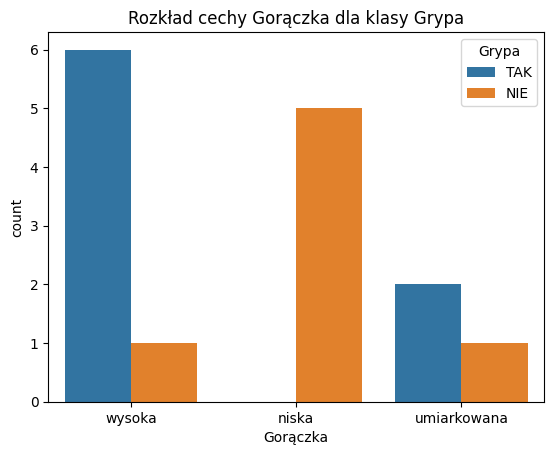

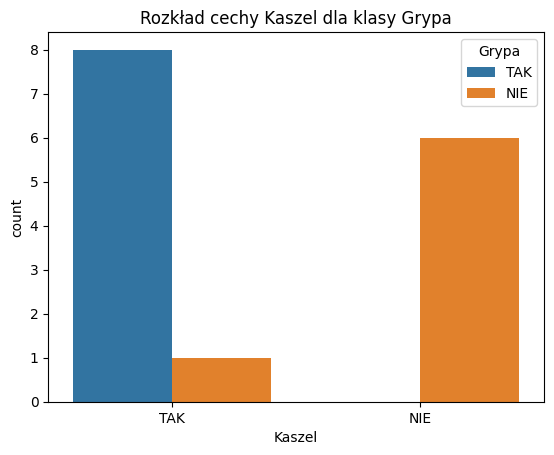

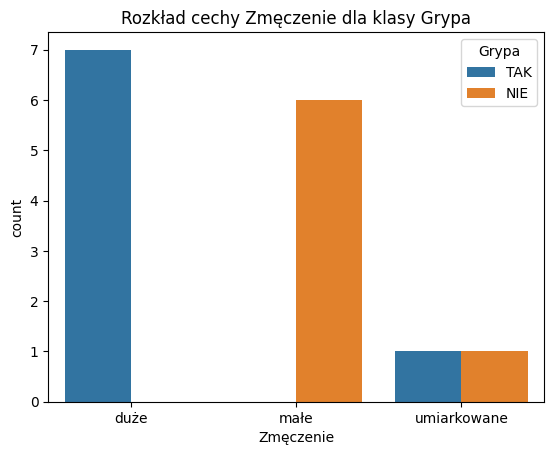

In [85]:
for feature in features:
    sns.countplot(data=df_grypa, x=feature, hue=target)
    plt.title(f"Rozkład cechy {feature} dla klasy {target}")
    plt.show()

## Predykcja dla 3 pacjentów

## Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
- Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
- Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
- Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

In [86]:
features = ["Gorączka", "Kaszel", "Zmęczenie"]
target = "Grypa"
x_encoded = df_grypa[features].copy()
le_dict = {}

for feature in features:
    le = LabelEncoder()
    x_encoded[feature] = le.fit_transform(df_grypa[feature])
    le_dict[feature] = le

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df_grypa[target])

model = CategoricalNB()
model.fit(x_encoded, y_encoded)

CategoricalNB()

In [100]:
pacjent_a = {
    "Gorączka": "wysoka",
    "Kaszel": "TAK",
    "Zmęczenie": "duże"
}

pacjent_b = {
    "Gorączka": "niska",
    "Kaszel": "NIE",
    "Zmęczenie": "małe"
}

pacjent_c = {
    "Gorączka": "umiarkowana",
    "Kaszel": "TAK",
    "Zmęczenie": "umiarkowane"
}

pacjent_d = {
    "Gorączka": "umiarkowana",
    "Kaszel": "NIE",
    "Zmęczenie": "duże"
}

pacjenci = [pacjent_a, pacjent_b, pacjent_c, pacjent_d]

for pacjent in pacjenci:
    pacjent_encoded = []

    for feature, value in pacjent.items():
        value = pacjent[feature]
        le = le_dict[feature]
        encoded_value = le.transform([value])[0]
        pacjent_encoded.append(encoded_value)

    prediction = model.predict([pacjent_encoded])
    prediction_proba = model.predict_proba([pacjent_encoded])

    print(f"Pacjent z cechami: {pacjent}")
    print(f"Predykcja: {le_target.inverse_transform(prediction)[0]}")
    print(f"Prawdopodobieństwa: TAK={prediction_proba[0][1]:.4f}, NIE={prediction_proba[0][0]:.4f}\n")

Pacjent z cechami: {'Gorączka': 'wysoka', 'Kaszel': 'TAK', 'Zmęczenie': 'duże'}
Predykcja: TAK
Prawdopodobieństwa: TAK=0.9907, NIE=0.0093

Pacjent z cechami: {'Gorączka': 'niska', 'Kaszel': 'NIE', 'Zmęczenie': 'małe'}
Predykcja: NIE
Prawdopodobieństwa: TAK=0.0029, NIE=0.9971

Pacjent z cechami: {'Gorączka': 'umiarkowana', 'Kaszel': 'TAK', 'Zmęczenie': 'umiarkowane'}
Predykcja: TAK
Prawdopodobieństwa: TAK=0.8516, NIE=0.1484

Pacjent z cechami: {'Gorączka': 'umiarkowana', 'Kaszel': 'NIE', 'Zmęczenie': 'duże'}
Predykcja: TAK
Prawdopodobieństwa: TAK=0.5930, NIE=0.4070



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v